# From dndz to cross-correlation bandpowers

This notebook shows you how to translate a cosmology and a dndz to cosmic shear, CMB lensing and shear-CMB-lensing cross-correlation bandpower predictions.

You need to install this Python package (orphics), which should be achievable with a simple pip command as shown in README.md.

Apart from that, the only non-trivial dependency (other than things like scipy, matplotlib, etc.) is the Python wrapper for CAMB.

On most systems with gcc 4.9+, you can install pycamb with:
```
pip install camb --user
```

See https://camb.readthedocs.io/en/latest/ for details.

In [1]:
%load_ext autoreload
%autoreload 2
from orphics import cosmology,io
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# First initialize a cosmology object with default params
lc = cosmology.LimberCosmology(lmax=3000,pickling=True)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_3000_20171220.pkl
Loaded cached Cls from  output/clphi_3000_20171220.txt
Initializing CMB window..
initializing power...


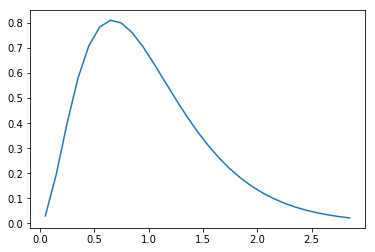

In [3]:
# Let's define a mock dndz
def dndz(z):
    z0 = 1./3.
    ans = (z**2.)* np.exp(-1.0*z/z0)/ (2.*z0**3.)
    return ans    

z_edges = np.arange(0.,3.0,0.1)
zcents = (z_edges[1:]+z_edges[:-1])/2.
plt.figure()
plt.plot(zcents,dndz(zcents))
plt.show()


('Initializing galaxy window for ', 'g', ' ...')


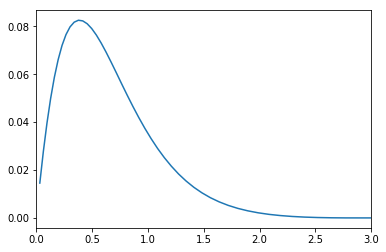

In [7]:
# Let's add this dndz to the cosmology object. By default, LimberCosmology doesn't allow you to reuse tag names, but here we force it to since this is a Python notebook!
lc.addNz(tag="g",zedges=z_edges,nz=dndz(zcents),ignore_exists=True)

# and plot the resulting lensing kernel

plt.figure()
plt.plot(lc.zs,lc.kernels["g"]['W'])
plt.xlim(0,3)
plt.show()


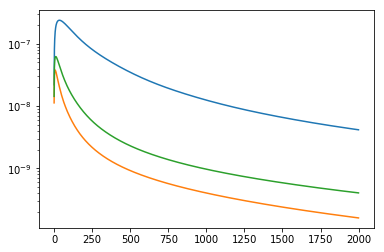

In [5]:
# Finally, we can get the bandpowers

ellrange = np.arange(0,2000,1)
lc.generateCls(ellrange)
clkk = lc.getCl("cmb","cmb")
clkg = lc.getCl("cmb","g")
clgg = lc.getCl("g","g")

plt.figure()
plt.yscale('log')
plt.plot(ellrange,clkk)
plt.plot(ellrange,clgg)
plt.plot(ellrange,clkg)
plt.show()

# That's it!